In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from string import Formatter
from matplotlib.ticker import FuncFormatter



In [2]:
# Reading two csv files and combining them together
def read_data():

    path = r"E:\Metro1\artifacts\\"
    df1=pd.read_csv(path + "outputfile_1.csv")
    df2=pd.read_csv(path + "outputfile_2.csv")
    df3=pd.read_csv(path + "outputfile_3.csv")
    df4=pd.read_csv(path + "outputfile_4.csv")

# df_parking=pd.read_csv('parking.csv')

    df=pd.concat([df1,df2,df3,df4])
    df_park=pd.concat([df2,df3,df4])
    df['VEHICLE']=np.where((df['CARS']==0) & (df['TWO_WHEELER']==0),0,1)
    df_park['VEHICLE']=np.where((df_park['CARS']==0) & (df_park['TWO_WHEELER']==0),0,1)
    return df,df_park
df,df_park=read_data()

Mapping Access and egress distances into 3 bins each

In [3]:
def map_distances():
    df["ACCESS_DIS"]=df["ACCESS_DIS"].astype(int)
    df['ACCESS_DIS_BIN']=0


    def map_access_dis(ACCESS_DIS):
        if ACCESS_DIS in [1, 2]:
            return 1
        elif ACCESS_DIS in [3,4,5,6]:
            return 2
        elif ACCESS_DIS in [7,8,9,10,11]:
            return 3

    # Apply the mapping function to create the 'ACCESS_DIS_BIN' column
    df['ACCESS_DIS_BIN'] = df['ACCESS_DIS'].apply(map_access_dis)
    # print(df['ACCESS_DIS_BIN'].value_counts())

    df['EGRESS_DIS_BIN']=0
    df["EGRESS_DIS"]=df["EGRESS_DIS"].astype(int)

    def map_egress_dis(EGRESS_DIS):
        if EGRESS_DIS in [1,2]:
            return 1
        if EGRESS_DIS in [3,4,5,6]:
            return 2
        if EGRESS_DIS in [7,8,9,10,11]:
            return 3
        elif EGRESS_DIS in [0]:
            return 1
    

    # Apply the mapping function to create the 'EGRESS_DIS_BIN' column
    df['EGRESS_DIS_BIN'] = df['EGRESS_DIS'].apply(map_egress_dis)
    # print(df['EGRESS_DIS_BIN'].value_counts())
    

    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df['ACCESS_TIME_B'] = pd.cut(df['ACCESS_TIME'], bins=bins, labels=labels)


    # Define the bin ranges
    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df['EGRESS_TIME_B'] = pd.cut(df['EGRESS_TIME'], bins=bins, labels=labels)




    df_park["ACCESS_DIS"]=df_park["ACCESS_DIS"].astype(int)
    df_park['ACCESS_DIS_BIN']=0


    def map_access_dis(ACCESS_DIS):
        if ACCESS_DIS in [1, 2]:
            return 1
        elif ACCESS_DIS in [3,4,5,6]:
            return 2
        elif ACCESS_DIS in [7,8,9,10,11]:
            return 3

    # Apply the mapping function to create the 'ACCESS_DIS_BIN' column
    df_park['ACCESS_DIS_BIN'] = df_park['ACCESS_DIS'].apply(map_access_dis)
    # print(df_park['ACCESS_DIS_BIN'].value_counts())

    df_park['EGRESS_DIS_BIN']=0
    df_park["EGRESS_DIS"]=df_park["EGRESS_DIS"].astype(int)

    def map_egress_dis(EGRESS_DIS):
        if EGRESS_DIS in [1,2]:
            return 1
        if EGRESS_DIS in [3,4,5,6]:
            return 2
        if EGRESS_DIS in [7,8,9,10,11]:
            return 3
        elif EGRESS_DIS in [0]:
            return 1
    

    # Apply the mapping function to create the 'EGRESS_DIS_BIN' column
    df_park['EGRESS_DIS_BIN'] = df_park['EGRESS_DIS'].apply(map_egress_dis)
    # print(df_park['EGRESS_DIS_BIN'].value_counts())
    

    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df_park['ACCESS_TIME_B'] = pd.cut(df_park['ACCESS_TIME'], bins=bins, labels=labels)


    # Define the bin ranges
    bins = [0, 5, 10, 20, 60]

    # Define labels for the bins
    labels = ['1-5', '6-10', '11-20', '21-60']

    # Use pd.cut() to create the bins
    df_park['EGRESS_TIME_B'] = pd.cut(df_park['EGRESS_TIME'], bins=bins, labels=labels)

    

    df['ACCESS_DISTANCE'].unique()

    distance={'0.5 to 1 km ':0.75, '< 0.5 km ':0.5, '2.5 km to 3 km ':2.75, '1 km to 1.5 km ':1.25,
       '2 km to 2.5 km ':2.25, '> 5 km ':5, '1.5 km to 2 km ':1.75, '3.5 km to 4 km ':3.75,
       '3 km to 3.5 km ':3.25, '4 km to 4.5 km ':4.25, '4.5 km to 5 km ':4.75,'0.5 km to 1 km ':0.75}



# now create a new column using above dictionary and map value of column ACCESS_DISTANCE to it 
    df['AD']=df['ACCESS_DISTANCE'].map(distance)
    df['ED']=df['EGRESS_DISTANCE'].map(distance)

    df_park['AD']=df_park['ACCESS_DISTANCE'].map(distance)
    df_park['ED']=df_park['EGRESS_DISTANCE'].map(distance)



    return df,df_park
df,df_park=map_distances()

In [4]:
access_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Ride hire',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping ACCESS_M to above dictionary

df['A_M']=df['ACCESS_M'].map(access_map)



egress_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Ride hire',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping EGRESS_M to above dictionary

df['E_M']=df['EGRESS_M'].map(egress_map)

In [5]:
def map_age():
    age_mapping = {
    "18-25 yrs": 21.5,
    '> 60 yrs ':65,
    '36-45yrs ':40, 
    '36-45 yrs ':40, 
    '18-25 yrs ':22,
    '26-35 yrs ':30,
    '18-25yrs ':22,
    '26-35yrs ':30, 
    '46-60 yrs ':54,
      '46-60yrs ':54
    }

# Map the 'AGE' column to average values
    df['AGE'] = df['AGE'].map(age_mapping)
    df_park['AGE']=df_park['AGE'].map(age_mapping)

    return df,df_park

df,df_park=map_age()



Mapping Income levels into 6 groups. Income levels are available only for 1168 samples

In [6]:
def map_income():
       income_mapper={'>2 Lakhs':3, 'nan':0, '25,001 – 50,000':1, '1,00,001 – 2,00,000':3,
       '10,001 – 25,000':1, '50,001 – 1,00,000':2, '<=10,000':1}
       df['INCOME']=df.INCOME.map(income_mapper)
       df_park['INCOME']=df_park.INCOME.map(income_mapper)



       return df,df_park
df,df_park=map_income()


In [7]:
# Assumed a bicycle speed of 10 kmph
B_SPEED=0.20      # 12 kmph
TW_SPEED=0.784    # 47 kmph, here it is in Km/min
CAR_SPEED=0.667   # 40 kmph, 
AUTO_SPEED=0.534  # 32 kmph
WALK_SPEED=0.072  # 4.3 kmph

In [8]:
# create a new dataframe
data=pd.DataFrame()

df=df.loc[(df['ACCESS_TIME']<30) & (df['EGRESS_TIME']<30)]
df=df.loc[(df['ACCESS_TIME']>0) & (df['EGRESS_TIME']>0)]    
data['AGE']=df['AGE']
# copy the columns RENT_BICYCLE  to data from df

data['USE']=df['RENT_BICYCLE']


# For ACCESS_M equal to 1 copy ACCESS_TIME to data and for ACCESS_M equal to 3,7,8 copy (df['ACCESS_TIME'] * TW_SPEED)/ B_SPEED) and for ACCESS_M equal to 4,6 
# copy (df['ACCESS_TIME'] * CAR_SPEED)/ B_SPEED) and for ACCESS_M equal to 5 copy (df['ACCESS_TIME'] * AUTO_SPEED)/ B_SPEED)


data['ACCESS_TIME'] = df['ACCESS_TIME']

data['ACCESS_DISTANCE']=df['AD']
data['EGRESS_DISTANCE']=df['ED']

# data = data.reset_index(drop=True)  # Resetting index to avoid duplicate labels

data['ACCESS_TIME'] = np.where(df['ACCESS_M'] == 1, (df['ACCESS_TIME'] * WALK_SPEED) / B_SPEED, data['ACCESS_TIME'])
data['ACCESS_TIME'] = np.where((df['ACCESS_M'] == 3) | (df['ACCESS_M'] == 7), (df['ACCESS_TIME'] * TW_SPEED) / B_SPEED, data['ACCESS_TIME'])
data['ACCESS_TIME'] = np.where((df['ACCESS_M'] == 4) | (df['ACCESS_M'] == 6), (df['ACCESS_TIME'] * CAR_SPEED) / B_SPEED, data['ACCESS_TIME'])
data['ACCESS_TIME'] = np.where(df['ACCESS_M'] == 5, (df['ACCESS_TIME'] * AUTO_SPEED) / B_SPEED, data['ACCESS_TIME'])
data['ACCESS_TIME'] = np.where(df['ACCESS_M'] == 2, df['ACCESS_TIME'], data['ACCESS_TIME'])

# Check for duplicate indices in the 'data' DataFrame

data['EGRESS_TIME']=df['EGRESS_TIME']

data['EGRESS_TIME'] = np.where(df['EGRESS_M'] == 1, (df['EGRESS_TIME'] * WALK_SPEED) / B_SPEED, data['EGRESS_TIME'])
data['EGRESS_TIME'] = np.where((df['EGRESS_M'] == 3) | (df['EGRESS_M'] == 7), (df['EGRESS_TIME'] * TW_SPEED) / B_SPEED, data['EGRESS_TIME'])
data['EGRESS_TIME'] = np.where((df['EGRESS_M'] == 4) | (df['EGRESS_M'] == 6), (df['EGRESS_TIME'] * CAR_SPEED) / B_SPEED, data['EGRESS_TIME'])
data['EGRESS_TIME'] = np.where(df['EGRESS_M'] == 5, (df['EGRESS_TIME'] * AUTO_SPEED) / B_SPEED, data['EGRESS_TIME'])
data['EGRESS_TIME'] = np.where(df['EGRESS_M'] == 2, df['EGRESS_TIME'], data['EGRESS_TIME'])

data['ALT1']=np.where(df['RENT_BICYCLE']==1,1,0)
data['ALT2']=np.where(df['RENT_BICYCLE']==2,1,0)
data['ALT3']=np.where(df['RENT_BICYCLE']==3,1,0)
data['ALT4']=np.where(df['RENT_BICYCLE']==4,1,0)

data['WB'] = np.where((df['O_TYPE'] == 'Work') | (df['D_TYPE'] == 'Work'), 1,0)

data['GENDER']=df['MALE']
data['UNO']=1
data['SERO']=0
data['VEHICLE']=df['VEHICLE']

# Also give a column name to column index as ID
data.index.name = 'ID'
# data.to_csv('data.csv',index=True)
# data.shape[0]


Unique values in 'A_M' column:
['Walk' 'Ride hire' 'Two wheeler' 'Other' 'Car' 'Bicycle']

Counts for each unique value:
Walk           1629
Two wheeler     267
Ride hire       219
Other           122
Car              23
Bicycle          16
Name: A_M, dtype: int64


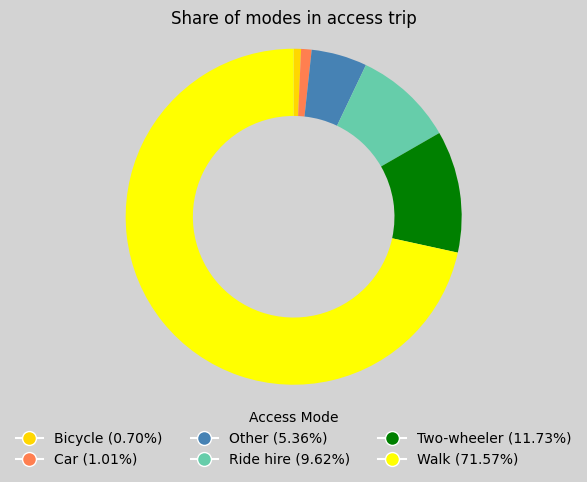

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
total = len(df['A_M'])
counts = df['A_M'].value_counts(normalize=True).sort_index() * 100

# Print unique values and counts for troubleshooting
print("Unique values in 'A_M' column:")
print(df['A_M'].unique())

print("\nCounts for each unique value:")
print(df['A_M'].value_counts())

# Define a custom color palette
custom_palette = ['gold', 'coral', 'steelblue', 'mediumaquamarine', 'green', 'yellow']

# Create a pie chart
fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgrey')  # Set the background color

# Inner circle (donut chart)
ax.pie([1], radius=0.6, colors=['lightgrey'], startangle=90, counterclock=False)

# Outer circle (pie chart)
wedges, texts = ax.pie(counts, startangle=90, counterclock=False, wedgeprops=dict(width=0.4), colors=custom_palette)

# Add percentage labels inside the pie chart
for text in texts:
    text.set(color='black', size=10, weight='bold')

# Set aspect ratio to be equal for a circular pie chart
ax.axis('equal')

# Create a legend with labels and colors
legend_labels = ['Bicycle', 'Car', 'Other', 'Ride hire', 'Two-wheeler', 'Walk']
legend_colors = custom_palette[:len(legend_labels)]  # Use only the relevant colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
legend = plt.legend(handles, legend_labels, title='Access Mode', loc='center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)

# Add percentage labels next to the legend
for label, percentage in zip(legend.get_texts(), counts):
    label.set_text(f'{label.get_text()} ({percentage:.2f}%)')

plt.title('Share of modes in access trip')
plt.show()


Unique values in 'E_M' column:
['Ride hire' 'Walk' 'Other' 'Two wheeler' 'Car' 'Bicycle' nan]

Counts for each unique value:
Walk           1794
Ride hire       262
Two wheeler     107
Other            94
Car              14
Bicycle           4
Name: E_M, dtype: int64


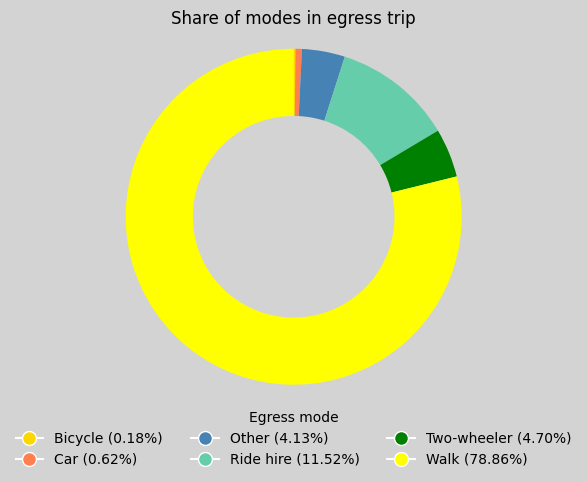

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
total = len(df['E_M'])
counts = df['E_M'].value_counts(normalize=True).sort_index() * 100

# Print unique values and counts for troubleshooting
print("Unique values in 'E_M' column:")
print(df['E_M'].unique())

print("\nCounts for each unique value:")
print(df['E_M'].value_counts())

# Define a custom color palette
custom_palette = ['gold', 'coral', 'steelblue', 'mediumaquamarine', 'green', 'yellow']

# Create a pie chart
fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgrey')  # Set the background color

# Inner circle (donut chart)
ax.pie([1], radius=0.6, colors=['lightgrey'], startangle=90, counterclock=False)

# Outer circle (pie chart)
wedges, texts = ax.pie(counts, startangle=90, counterclock=False, wedgeprops=dict(width=0.4), colors=custom_palette)

# Add percentage labels inside the pie chart
for text in texts:
    text.set(color='black', size=10, weight='bold')

# Set aspect ratio to be equal for a circular pie chart
ax.axis('equal')

# Create a legend with labels and colors
legend_labels = ['Bicycle', 'Car', 'Other', 'Ride hire', 'Two-wheeler', 'Walk']
legend_colors = custom_palette[:len(legend_labels)]  # Use only the relevant colors
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
legend = plt.legend(handles, legend_labels, title='Egress mode', loc='center', bbox_to_anchor=(0.5, -0.1), ncol=3, frameon=False)

# Add percentage labels next to the legend
for label, percentage in zip(legend.get_texts(), counts):
    label.set_text(f'{label.get_text()} ({percentage:.2f}%)')

plt.title('Share of modes in egress trip')
plt.show()


In [11]:

# Assumed a bicycle speed of 10 kmph
B_SPEED=0.20      # 12 kmph
TW_SPEED=0.784    # 47 kmph, here it is in Km/min
CAR_SPEED=0.667   # 40 kmph, 
AUTO_SPEED=0.534  # 32 kmph
WALK_SPEED=0.072  # 4.3 kmph

# B_SPEED_UPPER_LIMIT=0.34
# TW_SPEED_UPPER_LIMIT=1.34
# CAR_SPEED_UPPER_LIMIT=1.34
# AUTO_SPEED_UPPER_LIMIT=1.34
# WALK_SPEED_UPPER_LIMIT=0.15


df=df.loc[(df['ACCESS_TIME']<30) & (df['EGRESS_TIME']<30)]
df=df.loc[(df['ACCESS_TIME']>0) & (df['EGRESS_TIME']>0)] 
# Filtering and Speed Mapping
df = df[df['ACCESS_M'] < 8]
Speeds = {1: WALK_SPEED, 5: AUTO_SPEED, 3: TW_SPEED, 4: CAR_SPEED, 6: CAR_SPEED, 2: B_SPEED, 7: TW_SPEED}
df['SPEED_A'] = df['ACCESS_M'].map(Speeds)
df['ADC'] = df['SPEED_A'] * df['ACCESS_TIME']
df['SPEED_E'] = df['EGRESS_M'].map(Speeds)
df['EDC'] = df['SPEED_E'] * df['EGRESS_TIME']

df['ACCESS_DISTANCE_DIFF'] = abs(df['ADC'] - df['AD'])
df['EGRESS_DISTANCE_DIFF'] = abs(df['EDC'] - df['ED'])

df = df.loc[(df['ACCESS_DISTANCE_DIFF'] < 1.25) & (df['EGRESS_DISTANCE_DIFF'] < 1.25)]

# Creating data1 DataFrame
data1 = pd.DataFrame()

data1['USE'] = df['RENT_BICYCLE']
data1['ACCESS_TIME'] = df['ACCESS_TIME']
data1['ACCESS_DISTANCE']=df['ADC']
data1['EGRESS_DISTANCE']=df['EDC']
# Access Time adjustments
data1['ACCESS_TIME'] = np.where(df['ACCESS_M'] == 1, (df['ACCESS_TIME'] * WALK_SPEED) / B_SPEED, data1['ACCESS_TIME'])
data1['ACCESS_TIME'] = np.where((df['ACCESS_M'] == 3) | (df['ACCESS_M'] == 7), (df['ACCESS_TIME'] * TW_SPEED) / B_SPEED, data1['ACCESS_TIME'])
data1['ACCESS_TIME'] = np.where((df['ACCESS_M'] == 4) | (df['ACCESS_M'] == 6), (df['ACCESS_TIME'] * CAR_SPEED) / B_SPEED, data1['ACCESS_TIME'])
data1['ACCESS_TIME'] = np.where(df['ACCESS_M'] == 5, (df['ACCESS_TIME'] * AUTO_SPEED) / B_SPEED, data1['ACCESS_TIME'])
data1['ACCESS_TIME'] = np.where(df['ACCESS_M'] == 2, df['ACCESS_TIME'], data1['ACCESS_TIME'])

data1['EGRESS_TIME'] = df['EGRESS_TIME']

# Egress Time adjustments
data1['EGRESS_TIME'] = np.where(df['EGRESS_M'] == 1, (df['EGRESS_TIME'] * WALK_SPEED) / B_SPEED, data1['EGRESS_TIME'])
data1['EGRESS_TIME'] = np.where((df['EGRESS_M'] == 3) | (df['EGRESS_M'] == 7), (df['EGRESS_TIME'] * TW_SPEED) / B_SPEED, data1['EGRESS_TIME'])
data1['EGRESS_TIME'] = np.where((df['EGRESS_M'] == 4) | (df['EGRESS_M'] == 6), (df['EGRESS_TIME'] * CAR_SPEED) / B_SPEED, data1['EGRESS_TIME'])
data1['EGRESS_TIME'] = np.where(df['EGRESS_M'] == 5, (df['EGRESS_TIME'] * AUTO_SPEED) / B_SPEED, data1['EGRESS_TIME'])
data1['EGRESS_TIME'] = np.where(df['EGRESS_M'] == 2, df['EGRESS_TIME'], data1['EGRESS_TIME'])


# Other columns
data1['ALT1'] = np.where(df['RENT_BICYCLE'] == 1, 1, 0)
data1['ALT2'] = np.where(df['RENT_BICYCLE'] == 2, 1, 0)
data1['ALT3'] = np.where(df['RENT_BICYCLE'] == 3, 1, 0)
data1['ALT4'] = np.where(df['RENT_BICYCLE'] == 4, 1, 0)

data1['WB'] = np.where((df['O_TYPE'] == 'Work') | (df['D_TYPE'] == 'Work'), 1, 0)
data1['AGE']=df['AGE']
data1['GENDER'] = df['MALE']
data1['UNO'] = 1
data1['SERO'] = 0
data1['VEHICLE']=df['VEHICLE']
# Save to CSV
data1.index.name = 'ID'
# data1.to_csv('data1.csv', index=True)

print("Final DataFrame size:", data1.shape[0])

# Reading data again
df, df_park = read_data()
df, df_park = map_distances()
df, df_park = map_age()

print(df.shape[0])


Final DataFrame size: 1338
2493


In [12]:
df['M_ORIGIN'].dropna()
df=df[df['M_ORIGIN']!='Purple line ']

dict_stations={'Jallalhi': 'Jalahalli (green line)',
             'Mahalakshmi ': 'Mahalakshmi (green line)',
       'Majestic': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Banashankari': 'Banashankari (green line)', 
       'Byapanahalli': 'Baiyappanahalli (purple line)', 
       'Vajarahalli': 'Vajarahalli (green line)',
       'Kengeri to byp BYP': 'Kengeri (purple line)',
         'Byp': 'Baiyappanahalli (purple line)', 
         'Byapanahalli ': 'Baiyappanahalli (purple line)', 
         'Nagasandra ': 'Nagasandra (green line)',
       'Jallahalli': 'Jalahalli (green line)', 
       'Kengeri ': 'Kengeri (purple line)', 
       'Jalahalli ': 'Jalahalli (green line)',
         'Jallahlli': 'Jalahalli (green line)', 
         'Jalahalli': 'Jalahalli (green line)',
       'MAJESTIC': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
         'Majestic ': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
           'KENGERI': 'Kengeri (purple line)',
       'Kranthiveera sangolli rayanna ': 'Kranthiveera Sangolli Rayanna Railway Station (purple line)',
         'National College ': 'National College (green line)',
       'Kranthi Veera sanguli rayanna ': 'Kranthiveera Sangolli Rayanna Railway Station (purple line)',
         'Magadi road': 'Magadi Road (purple line)',
           'Bayappanahalli': 'Baiyappanahalli (purple line)',
       'Yelachinahalli': 'Yelachenahalli (green line)',
         'Silk institute ': 'Silk Institute (green line)',
           'Lalbagh': 'Lalbagh (green line)',
       'Central colleger sir m visvesaraya ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Sir M. Vishweshwaraya ,central college ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Central M visvesaraya ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
         'Centarl': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'SirM Vishweshwaraya stn.central college ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Sandal soap factory': 'Sandal Soap Factory (green line)',
         'Mysuru road': 'Mysore Road (purple line)', 
         'Rajarajeshwari nagar': 'Rajarajeshwari Nagar (purple line)',
       'Kengeri': 'Kengeri (purple line)', 
       'Vishweshwaraya central college ': 'Sir.M.Visvesvaraya Stn., Central College (purple line)',
       'Peenya industries ': 'Peenya Industry (green line)',
       'Cubbon park': 'Cubbon Park (purple line)',
         'Indiranagar': 'Indiranagar (purple line)',
           'Indiranagar ': 'Indiranagar (purple line)', 
           'Indranagar ': 'Indiranagar (purple line)',
       'Jnanabharthi ': 'Jnanabharathi (purple line)',
         'Jnanabharathi ': 'Jnanabharathi (purple line)', 
         'Vijaynagar ': 'Vijayanagar (purple line)',
         'Krantivira Sangolli Rayanna Railway Station (purple line)': 'Kranthiveera Sangolli Rayanna Railway Station (purple line)'
         }
# use dict_stations to rename the objects in M_ORIGIN column
df.loc[:, 'M_ORIGIN'] = df['M_ORIGIN'].replace(dict_stations)


df['M_ORIGIN'].nunique()

62

In [13]:
df['M_DESTINATION'].dropna()
df=df.loc[(df['M_DESTINATION']!='Purple line ') & (df['M_DESTINATION']!='Purple line') &(df['M_DESTINATION']!='Green line') 
            &(df['M_DESTINATION']!='K') & (df['M_DESTINATION']!='C')]
dest_dict={
         'Nagasandra to Silk institute ': 'Nagasandra (green line)', 
       'Majestic baiyapanahali': 'Baiyappanahalli (purple line)',
       'Nagasandra-silk institute ': 'Silk Institute (green line)',
       'Majestic baiyapanahali ': 'Baiyappanahalli (purple line)',
         'Baya':'Baiyappanahalli (purple line)',
           'Baiyapanahali majestic ': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Mantri square': 'Mantri Square Sampige Road (green line)',
         'Nag silk': 'Silk Institute (green line)', 
         'Nagasandra-Silk board': 'Silk Institute (green line)',
       'South end circle ': 'South End Circle (green line)',
         'Baiyapanahali kengeri ': 'Kengeri (purple line)',
       'Central college to pattanagere': 'Pattanagere (purple line)',
       'Yeswatpur majestic ': 'NadaPrabhu Kempegowda Station, Majestic (green/purple line)',
       'Nagasandra-Silk institute': 'Silk Institute (green line)',
         'Silk institute to Nagasandra ': 'Nagasandra (green line)',
       'Silkinstitute': 'Silk Institute (green line)',
         'Konnankunte cross': 'Konanakunte Cross (green line)',
           'RV road': 'Rashtreeya Vidyalaya Road (green line)',
       'Bayyappan to kengeri':'Kengeri (purple line)',
         'Majestic to byapnahalli':'Baiyappanahalli (purple line)',
           'Majestic':'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Banashankari to gurugunta':'Guruguntepalya (green line)',
         'Majestic to byapnahalli ':'Baiyappanahalli (purple line)',
       'SILK INSTITUTE - NAGASANDRA':'Nagasandra (green line)',
         'Peenya industries ':'Peenya Industry (green line)',
       'Bayyappanahalli to kengeri ':'Kengeri (purple line)',
         'Silk institute-Nagasandra':'Nagasandra (green line)',
       'SILK INSTITUTE-NAGASANDRA':'Nagasandra (green line)', 
       'Kengeri to bayyappanahalli ':'Baiyappanahalli (purple line)',
       'Kengeri to byapnahalli ':'Baiyappanahalli (purple line)',
         'NAGASANDRA-SILK institute':'Silk Institute (green line)',
       'silk institute-Nagasandra ':'Nagasandra (green line)',
         'NAGASANDRA-SILK INSTITUTE':'Silk Institute (green line)',
       'Silk institute-Nagasandra ':'Nagasandra (green line)',
         'Nagasandra - silk institute ':'Silk Institute (green line)',
       'Peenya industry ':'Peenya Industry (green line)', 
       'KENGERI - BAIYYAPANAHALLI':'Baiyappanahalli (purple line)',
       'Majestic kengeri to byp':'Baiyappanahalli (purple line)', 
       'Majestic ':'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
         'KENGERI-BAIYYAPANAHALLI':'Baiyappanahalli (purple line)',
       'BAIYYAPANAHALLI-KENGERI':'Kengeri (purple line)',
         'Bayyappanahalli to kengeri': 'Kengeri (purple line)',
       'Silk institute - nagasandra ':'Nagasandra (green line)',
         'Silkboard':'Silk Institute (green line)', 
         'Banashankari':'Banasankari (green line)',
       'Baiyapanahalli-Kengeri':'Kengeri (purple line)',
         'Srirampura':' Srirampura (green line)',
           'Yashwantpura':'Yeshwanthpur (green line)',
       'Baiyapanahalli-kengeri':'Kengeri (purple line)', 
       'KENGERI-BAIYYAPANAHALLI ':'Baiyappanahalli (purple line)',
       'NAGASANDRA-SILK INSTITUTE ':'Silk Institute (green line)', 
       'Nagasandra-Silk institute ':'Silk Institute (green line)',
       'Yeshwanthapura':'Yeshwanthpur (green line)',
         'Rajajinagar ':'Rajajinagar (green line)',
           'Banashankari ':'Banasankari (green line)',
       'Yelachanahalli-Nagasandra':'Nagasandra (green line)',
         'Dodda kallasndra':'Kallasandra (green line)',
           'Byp to kengeri':'Kengeri (purple line)',
       'Yelachanahalli-nagasandra':'Nagasandra (green line)', 
       'Silk institute to nagasandra ':'Nagasanadra (green line)',
       'Kengeri to bayappanahalli ':'Baiyappanahalli (purple line)',
       'Yelachanahalli-Nagasandra ':'Nagasandra (green line)', 
       'Sandal soap to nagasandra ':'Nagasanadra (green line)',
       'Byapnahalli to kengeri':'Kengeri (purple line)',
         'Byapnahalli to kengeri ':'Kengeri (purple line)',
           'Jalahalli ':'Jalahalli (green line)',
       'Vie':'Vesveshwaraiah (purple line)', 
       'Nagasandra to silk institute ':'Silk Institute (green line)',
         'Lslbagh':'Lalbagh (green line)',
       'Nagasandra yeswatpur ':'Yeswanthpur (green line)',
         'Nagasandra mgroad':'MG Road (purple line)',
           'Nagasandra jpnahar':'Jayaprakash Nagar (green line)',
       'Majestic jayanagar ':'Jayanagar (green line)',
         'Saha to bana':'Banasankari (green line)',
       'Purple line kengeri to byp':'Baiyaappanahalli (purple line)',
         'Chekpet jpnagar':'Jayaprakash Nagar (green line)', 
         'Kengeri to byp':'Baiyappanahalli (purple line)',
       'Purple line kegeri to byappanahalli ':'Baiyappanahalli (purple line)',
         'Byapnahalli to ken':'Kengeri (purple line)',
       'Kengeri Trinity ':'Trinity (purple line)',
       'Swami Vivekananda to kengeriterminal':'Kengeri Bus Terminal (purple line)',
         'Kangeri to hosahalli':'Hosanahalli (purple line)',
       'Kengeri Swami Vivekananda ':'Swami Vivekananda Road (purple line)',
         'Rajarajeswari - cubban park ':'Cubbon Park (purple line)',
       'Byp to kengeri ':'Kengeri (purple line)', 
       'Kengeri-byappanahalli':'Baiyappanahalli (purple line)', 
       'Kengeri -byapanahalli':'Baiyaappanahalli (purple line)',
         'Kengeri-byappanahalli ':'Baiyaappanahalli (purple line)',
       'Silk institute to Peenya industry':'Peenya Industry (green line)', 
       'Kengeri to byappanahalli ':'Baiyaappanahalli (purple line)',
       'Silk institute to Peenya industry ':'Peenya Industry (green line)',
       'Byapanahalli - kengeri ':'Kengeri (purple line)',
         'Byappanahalli to kengeri ':'Kengeri (purple line)',
       'Byapanahalli -kengeri':'Kengeri (purple line)', 
       'Hoodi (purple line)':'Hoody (purple line)',
       'Kundalahalli (purple line)':'Kundalahalli (purple line)',
         'Seetharampalya (purple line)':'Seetharampalya (purple line)',
       'Pattandur Agrahara (purple line)':'Pattandur Agrahara (purple line)',
       'Baiyaappanahalli (purple line)': 'Baiyappanahalli (purple line)',
       'Banasankari (green line)':'Banashankari (green line)',
       'Guruguntepalya (green line)':'Goraguntepalya (green line)',
       'Mahatma Gandhi Road (purple line)':'MG Road (purple line)',
       'NadaPrabhu Kempegowda Station, Majestic (green/purple line)': 'Nadaprabhu Kempegowda Station, Majestic (green/purple line)',
       'Nagasanadra (green line)':'Nagasandra (green line)','Yeshwanthpur (green line)':'Yeswanthpur (green line)',
       'Hosanahalli (purple line)':'Sri Balagangadharanatha Swamiji Station, Hosahalli (purple line)',
        'Vesveshwaraiah (purple line)':'Sir.M.Visvesvaraya Stn., Central College (purple line)',
        ' Srirampura (green line)': 'Srirampura (green line)',
        'Baiyaappanahalli (purple line)': 'Baiyappanahalli (purple line)',
        'Banasankari (green line)': 'Banashankari (green line)'

       }

df.loc[:, 'M_DESTINATION'] = df['M_DESTINATION'].replace(dest_dict)



# Filter the objects in columns M_ORIGIN and M_DESTINATION such that anything after '(' is ignored


# Sort objects of column M_DESTINATION alphabatically
df['M_DESTINATION'].sort_values().nunique()

73

In [14]:
df['M_ORIGIN'] = df['M_ORIGIN'].str.split('(').str[0]
df['M_DESTINATION'] = df['M_DESTINATION'].str.split('(').str[0]

Text(0.5, 1.0, 'Vehicle ownership vs. Bicycle Usage (N=2282)')

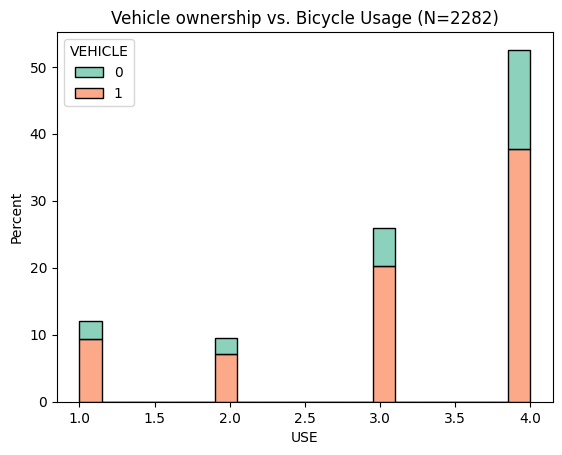

In [15]:
sns.histplot(data=data, x="USE", hue="VEHICLE", multiple="stack", palette="Set2",stat='percent')
plt.title("Vehicle ownership vs. Bicycle Usage (N=2282)")

Text(0.5, 1.0, 'Bicycle Usage vs. Access Time (N=2282)')

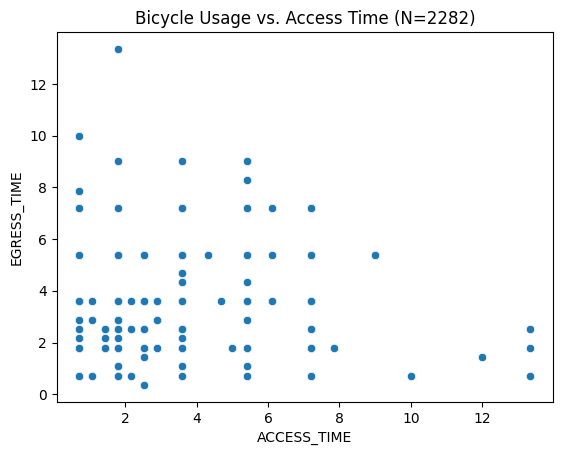

In [16]:
df3=data1[data1['USE']==3]
sns.scatterplot(data=df3,x='ACCESS_TIME',y='EGRESS_TIME')
plt.title("Bicycle Usage vs. Access Time (N=2282)")

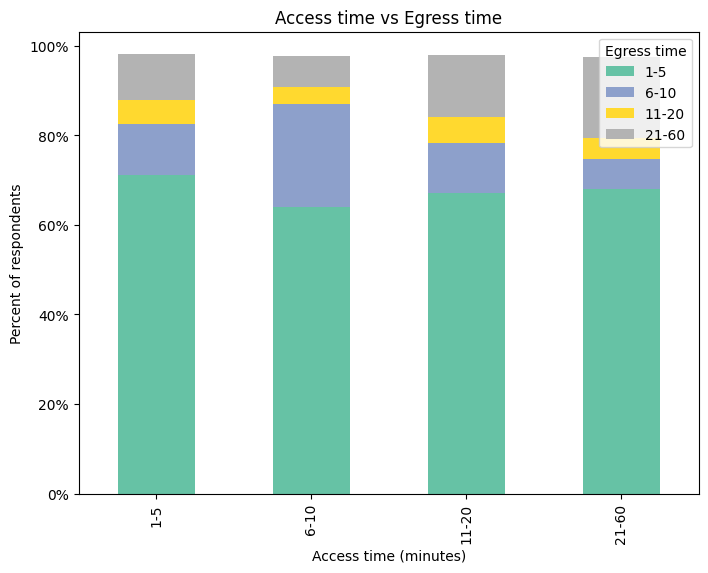

In [17]:
# Assuming 'data' is your DataFrame with columns 'EGRESS_TIME', 'USE', etc.
# Resetting index in case it's necessary
# data.reset_index(inplace=True)

# Filtering out the 'USE' category 3 (will not use for any trips)


# Creating bins for egress time
bins = [0, 5, 10, 20, 60]
labels = ['1-5', '6-10', '11-20', '21-60']

data['EGRESS_TIME_B'] = pd.cut(data['EGRESS_TIME'], bins=bins, labels=labels)



data['ACCESS_TIME_B'] = pd.cut(data['ACCESS_TIME'], bins=bins, labels=labels)

# Grouping by 'EGRESS_TIME_B' and 'USE', calculating percentage within each group
grouped = data.groupby(['ACCESS_TIME_B', 'EGRESS_TIME_B']).size().unstack().div(data.groupby('ACCESS_TIME_B').size(), axis=0)

# Plotting the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 6))
plt.title('Access time vs Egress time')
plt.xlabel('Access time (minutes)')
plt.ylabel('Percent of respondents')
plt.legend(title='Egress time', loc='upper right')

# Formatting y-axis ticks as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

plt.show()




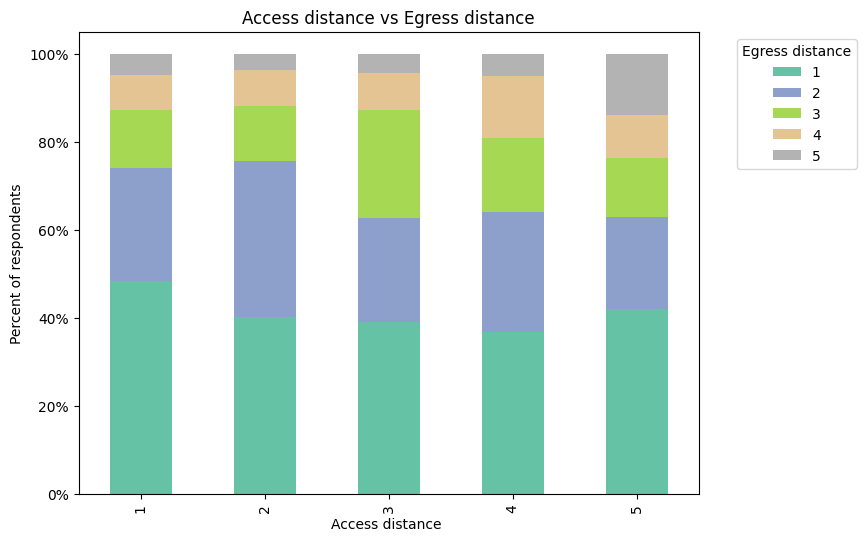

In [18]:
df=df.loc[(df['ACCESS_TIME']<30) & (df['EGRESS_TIME']<30)]
df=df.loc[(df['ACCESS_TIME']>0) & (df['EGRESS_TIME']>0)] 

grouped = df.groupby(['ACCESS_DIS_B', 'EGRESS_DIS_B']).size().unstack().div(df.groupby('ACCESS_DIS_B').size(), axis=0)

# Plotting the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 6))
plt.title('Access distance vs Egress distance')
plt.xlabel('Access distance ')
plt.ylabel('Percent of respondents')
plt.legend(title='Egress distance', bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatting y-axis ticks as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

plt.show()


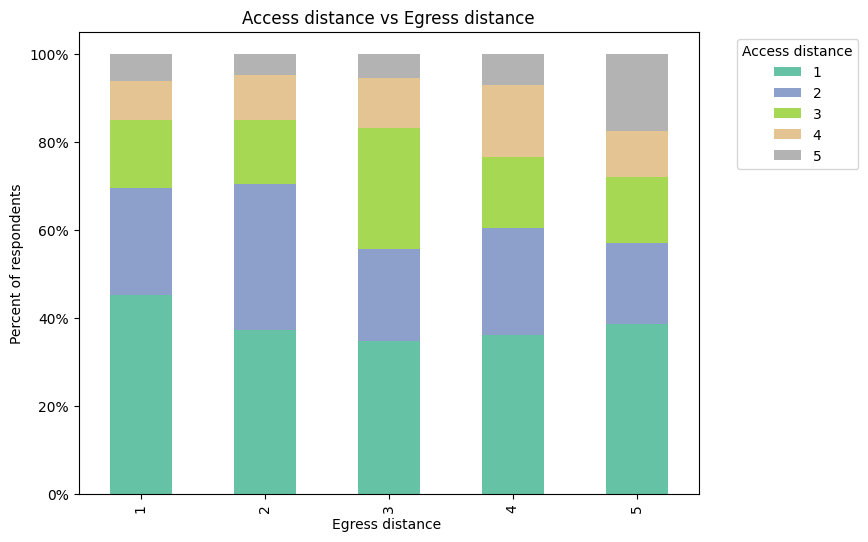

In [19]:


grouped = df.groupby([ 'EGRESS_DIS_B','ACCESS_DIS_B']).size().unstack().div(df.groupby('EGRESS_DIS_B').size(), axis=0)

# Plotting the stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 6))
plt.title('Access distance vs Egress distance')
plt.xlabel('Egress distance ')
plt.ylabel('Percent of respondents')
plt.legend(title='Access distance', bbox_to_anchor=(1.05, 1), loc='upper left')

# Formatting y-axis ticks as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%'))

plt.show()


In [20]:
B_SPEED_UPPER_LIMIT=0.34
TW_SPEED_UPPER_LIMIT=1.34
CAR_SPEED_UPPER_LIMIT=1.34
AUTO_SPEED_UPPER_LIMIT=1.34
WALK_SPEED_UPPER_LIMIT=0.15

maximum and minimum possible access distances


In [21]:
map_access_dis_min={1:0.1,2:0.5,3:1,4:1.5,5:2,6:2.5,7:3,8:3.5,9:4,10:4.5,11:5}
df['ACCESS_DIS_MIN']=df.ACCESS_DIS.map(map_access_dis_min)

map_acces_dis_max={1:0.5,2:1,3:1.5,3.5:2,4:2.5,5:3,6:3.5,7:4,8:4.5,9:5,10:5.5,11:20}
df['ACCESS_DIS_MAX']=df.ACCESS_DIS.map(map_acces_dis_max)

With increase in income levels more commuters are willing to use bicycle when one of the trip ends is home

1024


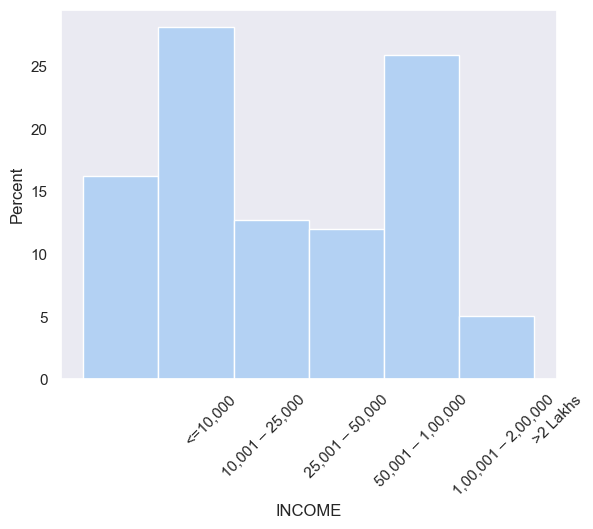

In [30]:

sns.histplot(data=df['INCOME'],stat='percent')
plt.xticks([1.2,1.9,3,4,5.1,5.8],['<=10,000','10,001 – 25,000','25,001 – 50,000','50,001 – 1,00,000','1,00,001 – 2,00,000','>2 Lakhs'])
# plt.tight_layout()
plt.xticks(rotation=45)
print(sum(df['INCOME'].value_counts()))

Cross-tabulation of Access distacce and egress distance

ACCESS_DIS_BIN      1      2      3
EGRESS_DIS_BIN                     
1               69.82  21.23   8.95
2               56.02  32.78  11.20
3               61.11  23.33  15.56
All             66.18  23.86   9.96


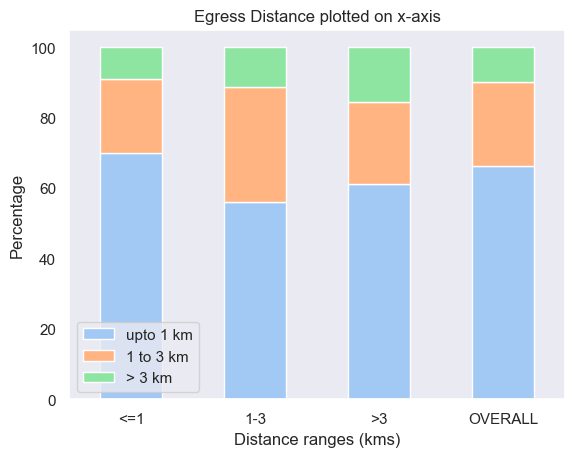

In [31]:
# df=df.loc[(df['RENT_BICYCLE']==1) | (df['RENT_BICYCLE']==2)]
crosstab=pd.crosstab(df['EGRESS_DIS_BIN'],df['ACCESS_DIS_BIN'],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Distance ranges (kms)')
plt.ylabel('Percentage')
plt.title("Egress Distance plotted on x-axis")
plt.xticks([0,1,2,3],['<=1','1-3','>3','OVERALL'])
plt.legend(['upto 1 km','1 to 3 km','> 3 km'])
plt.xticks(rotation=0)
plt.show()

Among people using it for either Access or Egress, if access distance is within 0.5 km then 75% of them are willing to use it for egress only 

In [34]:
df1=df.loc[(df['ACCESS_DIS_B']==1)]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
print(df1['TOTAL_TIME'].describe())
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(183, 60)
count    183.000000
mean      60.163934
std       48.700874
min       10.000000
25%       30.000000
50%       45.000000
75%       75.000000
max      420.000000
Name: TOTAL_TIME, dtype: float64


If access distance is between 0.5 to 1 km, then 68.6% are willing to use bicycle for access trip only


In [35]:
df1=df.loc[(df['ACCESS_DIS_B']==2)]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(124, 60)


If access distance is between 1 to 3 kms, then more people are opting for use of bicycle for access trip only

In [36]:
df1=df.loc[(df['ACCESS_DIS_BIN']==2)]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(129, 60)


If access distance is more than 3 km, 56.2% are willing to use it for access trip only. N=89

In [37]:
df1=df.loc[(df['ACCESS_DIS_BIN']==3) ]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(51, 60)


If Egress distance is within 1 km then 81.4 % of them are willing to use it for access only 


In [38]:
df2=df.loc[(df['EGRESS_DIS_B'] ==1)]
df2=df2.loc[(df2['RENT_BICYCLE']==1) | (df2['RENT_BICYCLE']==2)]
print(df2.shape)
px.histogram(data_frame=df2,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(226, 60)


For egress distance between 0.5 to 1 km, the share of commuters opting for egress only is 56%. (N=127)

In [39]:
df2=df.loc[(df['EGRESS_DIS_B'] ==2)]
df2=df2.loc[(df2['RENT_BICYCLE']==1) | (df2['RENT_BICYCLE']==2)]
print(df2.shape)
px.histogram(data_frame=df2,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(117, 60)


If the egress distance is between 1 to 3 km, then 80.5% are willing to use the bicycle for egress only. 

In [40]:
df2=df.loc[(df['EGRESS_DIS_BIN'] ==2)]
df2=df2.loc[(df2['RENT_BICYCLE']==1) | (df2['RENT_BICYCLE']==2)]
print(df2.shape)
px.histogram(data_frame=df2,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]})

(103, 60)


If either access distance or egress distance is less than 1 km, then proportion of that samples with ages less than 35 (85%) is more compared to overall sample (80%). May be that’s one of the reasons for more commuters choosing to use bicycle for both access and egress distance

In [41]:
df2=df.loc[(df['RENT_BICYCLE']==3) ]
df2=df2.loc[((df2['ACCESS_DIS_BIN']==1) & (df2['EGRESS_DIS_BIN']>1) ) | ((df2['ACCESS_DIS_BIN']>1) & (df2['EGRESS_DIS_BIN']==1) )]
print(df2['AGE_C'].value_counts())
print(df['AGE_C'].value_counts())

1    129
2     63
3     24
4     10
5      1
Name: AGE_C, dtype: int64
1    1231
2     617
3     265
4     120
5      26
Name: AGE_C, dtype: int64


•	Among the commuters who use bicycle for either Access or Egress trip, 66% are willing to use it for egress only if access time is less than 5 minutes. (N=219)

In [42]:
df,df_park=read_data()
df,df_park=map_distances()
df1=df.loc[(df['ACCESS_TIME_B']=='1-5')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(219, 58)


•	For access time between 6-20 minutes, the share of commuters opting for access only is 73%. (N=306)

In [43]:
df1=df.loc[(df['ACCESS_TIME_B']=='6-10') | (df['ACCESS_TIME_B']=='11-20')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(306, 58)


•	If the access time is above 20 minutes, then 62% are willing to use the bicycle for egress only. (N=37)

In [44]:
df1=df.loc[(df['ACCESS_TIME_B']=='21-60')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(37, 58)


Among the commuters who use bicycle for either Access or Egress trips, if egress time is less than 5 minutes, 76% are willing to use for access only (N=258)

In [45]:
df1=df.loc[(df['EGRESS_TIME_B']=='1-5')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(258, 58)


For egress time between 6 to 20 minutes, the share of commuters opting for egress only is 66%. (N=267)

In [46]:
df1=df.loc[(df['EGRESS_TIME_B']=='6-10') | (df['EGRESS_TIME_B']=='11-20')]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
# sns.countplot(data=df1,x='TOTAL_TIME')
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(267, 58)


If the egress time is above 20 minutes, then 59% are willing to use the bicycle for access only. (N=34)

In [47]:
df1=df.loc[(df['EGRESS_TIME_B']=='21-60') ]
df1=df1.loc[(df1['RENT_BICYCLE']==1) | (df1['RENT_BICYCLE'] ==2)]
print(df1.shape)
px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only"]},title='Bicycle use')

(34, 58)


Cross tabulation between access time and egress time

ACCESS_TIME_B    1-5   6-10  11-20  21-60
EGRESS_TIME_B                            
1-5            46.25  31.42  17.05   5.28
6-10           39.01  37.68  17.75   5.56
11-20          34.62  34.40  26.20   4.78
21-60          37.90  24.19  29.84   8.06
All            41.34  33.68  19.55   5.43


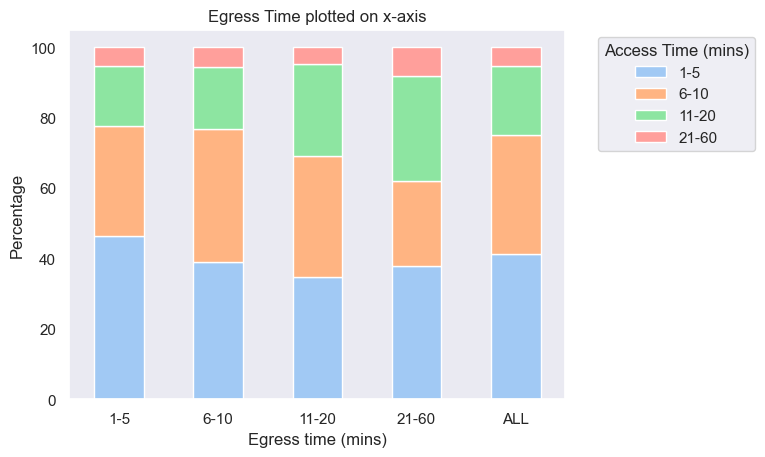

In [48]:
crosstab=pd.crosstab(df["EGRESS_TIME_B"],df["ACCESS_TIME_B"],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Egress time (mins)')
plt.ylabel('Percentage')
plt.title("Egress Time plotted on x-axis")
plt.xticks([0,1,2,3,4],['1-5','6-10','11-20','21-60','ALL'])
plt.legend(['1-5','6-10','11-20','21-60'])
plt.legend(title='Access Time (mins)',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

Hypothesis: People with own bicycle ownership are more willing to use bicycle than people without

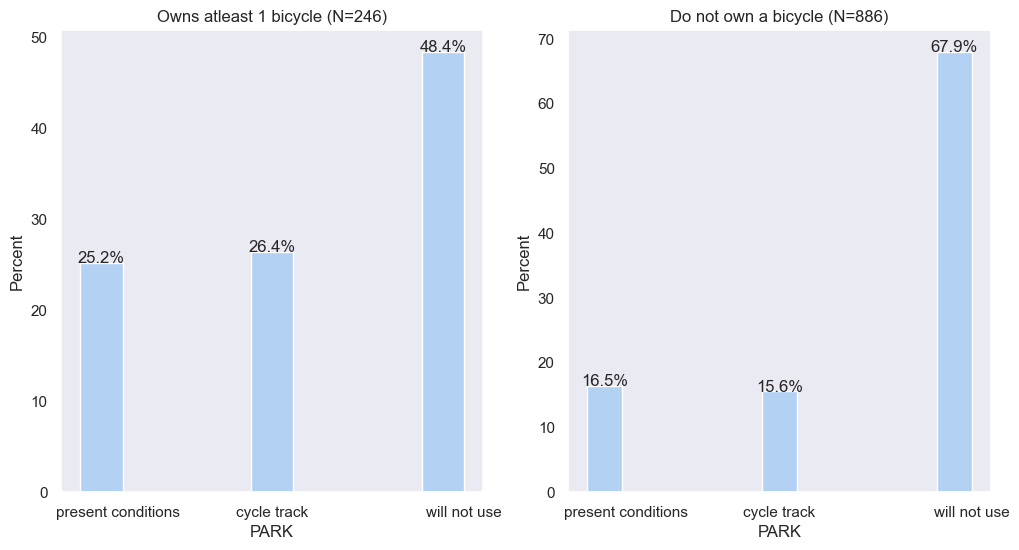

(246, 58) (886, 58)


In [49]:
df1=df_park.loc[((df_park['ORIGIN']==1) | (df_park['DESTINATION']==1))& (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[((df_park['ORIGIN']==1)| (df_park['DESTINATION']==1)) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
df2.loc[df2['PARK']==4,'PARK']=3

# plotting two countplots of column PARK from both dataframes df1 and df2, side by side
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.set_style('darkgrid')

custom_ticks_1 = [1.2, 2, 3]  # Customize these based on your data
custom_labels_1 = ['present conditions', 'cycle track', 'will not use']  # Customize these labels
ax[0].set_xticks(custom_ticks_1)
ax[0].set_xticklabels(custom_labels_1)
ax[1].set_xticks(custom_ticks_1)
ax[1].set_xticklabels(custom_labels_1)

histplot_1=sns.histplot(data=df1,x='PARK',ax=ax[0],stat='percent')
histplot_2=sns.histplot(data=df2,x='PARK',ax=ax[1],stat='percent')
ax[0].set_title('Owns atleast 1 bicycle (N=246)')
ax[1].set_title('Do not own a bicycle (N=886)')
for p in histplot_1.patches:
    percentage = p.get_height()
    if percentage > 0:
        x = p.get_x() + p.get_width() / 2
        y = percentage
        ax[0].annotate(f'{percentage:.1f}%', (x, y), ha='center')

# Add percentage labels on the bars for the second histogram (exclude 0%)
for p in histplot_2.patches:
    percentage = p.get_height()
    if percentage > 0:
        x = p.get_x() + p.get_width() / 2
        y = percentage
        ax[1].annotate(f'{percentage:.1f}%', (x, y), ha='center')
plt.show()
print(df1.shape,df2.shape)

Commuters who own bicycle opt more for cycle track than present conditions compared to people who doesn’t own bicycle in case of access trips

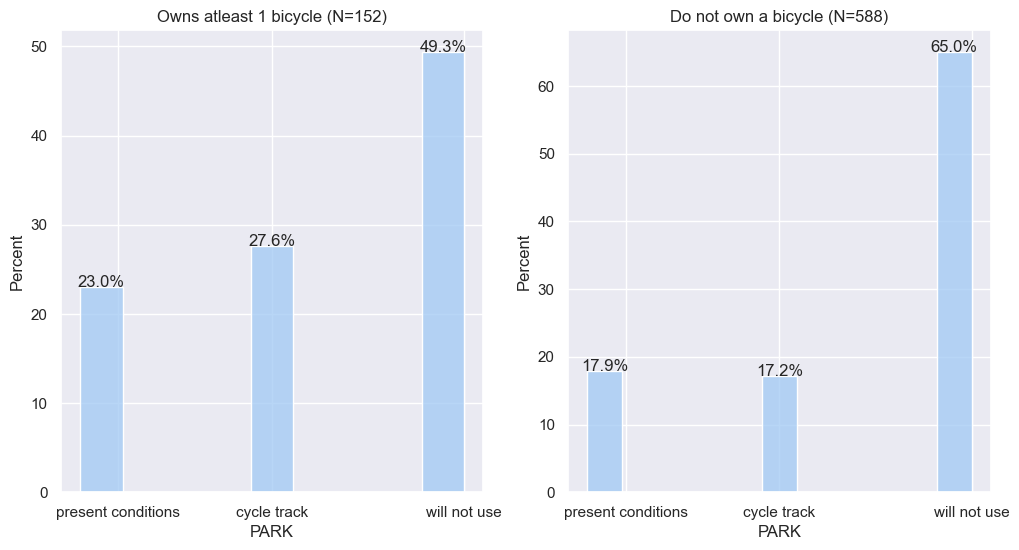

(152, 58) (588, 58)


In [50]:
df1=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
df2.loc[df2['PARK']==4,'PARK']=3

# plotting two countplots of column PARK from both dataframes df1 and df2, side by side
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.set_style('darkgrid')

custom_ticks_1 = [1.2, 2, 3]  # Customize these based on your data
custom_labels_1 = ['present conditions', 'cycle track', 'will not use']  # Customize these labels
ax[0].set_xticks(custom_ticks_1)
ax[0].set_xticklabels(custom_labels_1)
ax[1].set_xticks(custom_ticks_1)
ax[1].set_xticklabels(custom_labels_1)

histplot_1=sns.histplot(data=df1,x='PARK',ax=ax[0],stat='percent')
histplot_2=sns.histplot(data=df2,x='PARK',ax=ax[1],stat='percent')
ax[0].set_title('Owns atleast 1 bicycle (N=152)')
ax[1].set_title('Do not own a bicycle (N=588)')
for p in histplot_1.patches:
    percentage = p.get_height()
    if percentage > 0:
        x = p.get_x() + p.get_width() / 2
        y = percentage
        ax[0].annotate(f'{percentage:.1f}%', (x, y), ha='center')

# Add percentage labels on the bars for the second histogram (exclude 0%)
for p in histplot_2.patches:
    percentage = p.get_height()
    if percentage > 0:
        x = p.get_x() + p.get_width() / 2
        y = percentage
        ax[1].annotate(f'{percentage:.1f}%', (x, y), ha='center')
plt.show()
print(df1.shape,df2.shape)

For destination as home more commuters are willing to ride bicycle under current conditions

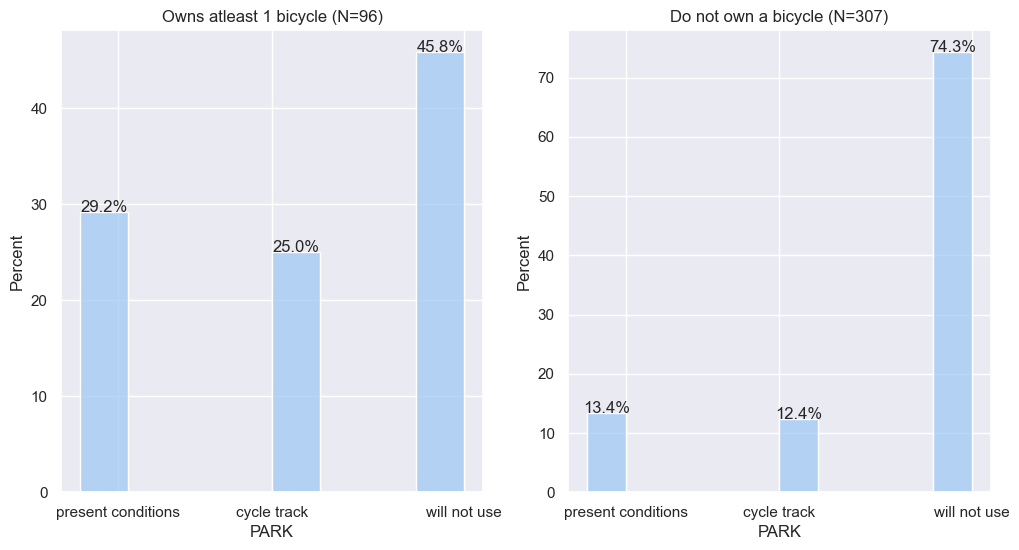

(96, 58) (307, 58)


In [51]:
df1=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
df2.loc[df2['PARK']==4,'PARK']=3

# plotting two countplots of column PARK from both dataframes df1 and df2, side by side
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.set_style('darkgrid')

custom_ticks_1 = [1.2, 2, 3]  # Customize these based on your data
custom_labels_1 = ['present conditions', 'cycle track', 'will not use']  # Customize these labels
ax[0].set_xticks(custom_ticks_1)
ax[0].set_xticklabels(custom_labels_1)
ax[1].set_xticks(custom_ticks_1)
ax[1].set_xticklabels(custom_labels_1)

histplot_1=sns.histplot(data=df1,x='PARK',ax=ax[0],stat='percent')
histplot_2=sns.histplot(data=df2,x='PARK',ax=ax[1],stat='percent')
ax[0].set_title('Owns atleast 1 bicycle (N=96)')
ax[1].set_title('Do not own a bicycle (N=307)')
for p in histplot_1.patches:
    percentage = p.get_height()
    if percentage > 0:
        x = p.get_x() + p.get_width() / 2
        y = percentage
        ax[0].annotate(f'{percentage:.1f}%', (x, y), ha='center')

# Add percentage labels on the bars for the second histogram (exclude 0%)
for p in histplot_2.patches:
    percentage = p.get_height()
    if percentage > 0:
        x = p.get_x() + p.get_width() / 2
        y = percentage
        ax[1].annotate(f'{percentage:.1f}%', (x, y), ha='center')
plt.show()
print(df1.shape,df2.shape)

In [52]:
df1=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[(df_park['DESTINATION']==1) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
print(df1.shape,df2.shape)

(96, 58) (307, 58)


Looking at the proporation of people willing to use bicycle over the day

1047 1005 322


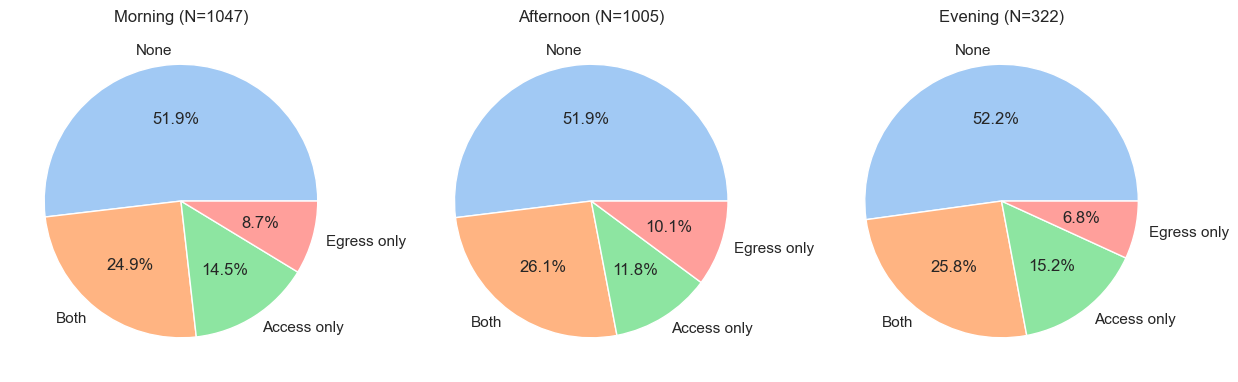

1    513
2    314
3    135
4     72
5     13
Name: AGE_C, dtype: int64 1    173
2     97
3     34
4     14
5      4
Name: AGE_C, dtype: int64


In [53]:
df1=df.loc[(df['START_TIME']>='08:00:00') & (df['START_TIME']<'12:00:00')]
df2=df.loc[(df['START_TIME']>='12:00:00') & (df['START_TIME']<'16:00:00')]
df3=df.loc[(df['START_TIME']>='16:00:00') & (df['START_TIME']<'20:00:00')]
print(df1.shape[0],df2.shape[0],df3.shape[0])
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pie(df1['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Morning (N=1047)')
plt.subplot(132)
plt.pie(df2['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Afternoon (N=1005)')
plt.subplot(133)
plt.pie(df3['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Evening (N=322)')
plt.show()

print(df1['AGE_C'].value_counts(),df3['AGE_C'].value_counts())

721 780 763 110


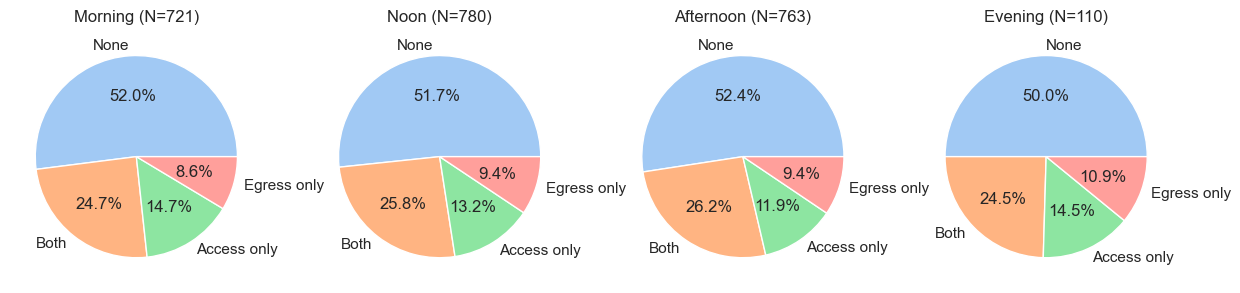

In [54]:
df1=df.loc[(df['START_TIME']>='08:00:00') & (df['START_TIME']<'11:00:00')]
df2=df.loc[(df['START_TIME']>='11:00:00') & (df['START_TIME']<'14:00:00')]
df3=df.loc[(df['START_TIME']>='14:00:00') & (df['START_TIME']<'17:00:00')]
df4=df.loc[(df['START_TIME']>='17:00:00') & (df['START_TIME']<'20:00:00')]
print(df1.shape[0],df2.shape[0],df3.shape[0],df4.shape[0])

# plotting all 4 pie charts of column RENT_BICYCLE for df1,df2,df3 and df4 in one figure
plt.figure(figsize=(15,5))
plt.subplot(141)
plt.pie(df1['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Morning (N=721)')
plt.subplot(142)
plt.pie(df2['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Noon (N=780)')
plt.subplot(143)
plt.pie(df3['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Afternoon (N=763)')
plt.subplot(144)
plt.pie(df4['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Evening (N=110)')
plt.show()




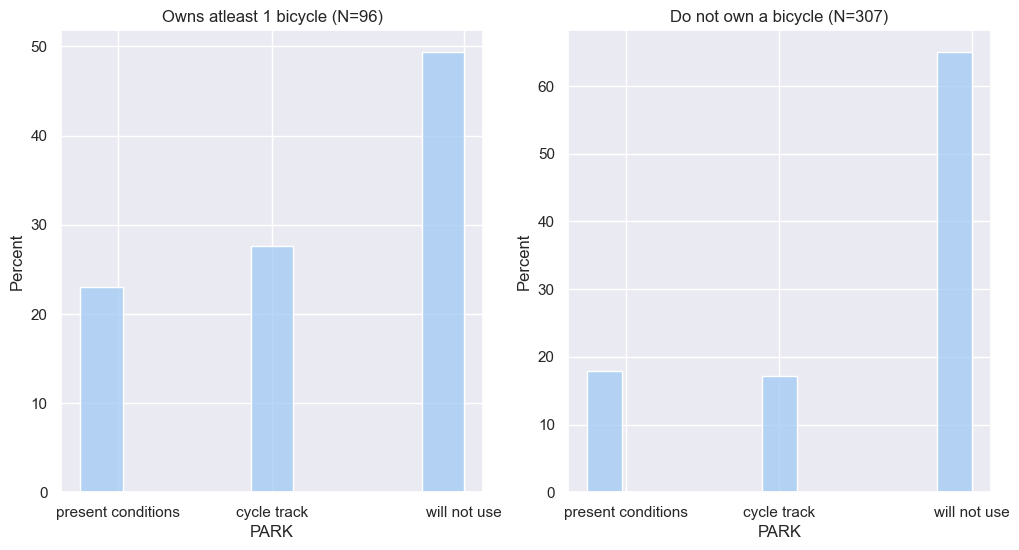

In [55]:
df1=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']>0)]
df1.loc[df1['PARK']==4,'PARK']=3
df2=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']==0)]
df2=df2.loc[df2['PARK']!=3]
df2.loc[df2['PARK']==4,'PARK']=3

# plotting two countplots of column PARK from both dataframes df1 and df2, side by side
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.set_style('darkgrid')

custom_ticks_1 = [1.2, 2, 3]  # Customize these based on your data
custom_labels_1 = ['present conditions', 'cycle track', 'will not use']  # Customize these labels
ax[0].set_xticks(custom_ticks_1)
ax[0].set_xticklabels(custom_labels_1)
ax[1].set_xticks(custom_ticks_1)
ax[1].set_xticklabels(custom_labels_1)

sns.histplot(data=df1,x='PARK',ax=ax[0],stat='percent')
sns.histplot(data=df2,x='PARK',ax=ax[1],stat='percent')
ax[0].set_title('Owns atleast 1 bicycle (N=96)')
ax[1].set_title('Do not own a bicycle (N=307)')
plt.show()


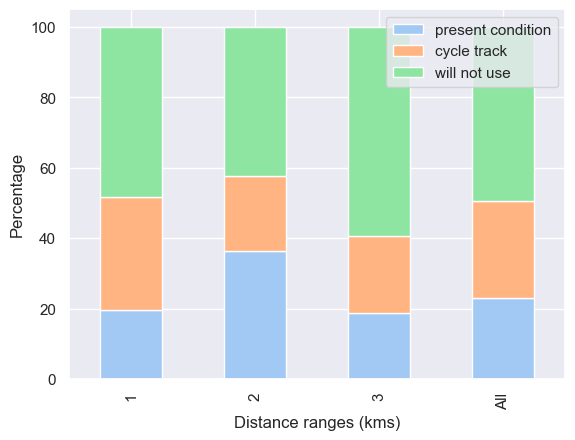

(152, 58)


In [56]:
df1=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']>0)]
crosstab=pd.crosstab(df1['ACCESS_DIS_BIN'],df1['PARK'],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Distance ranges (kms)')
plt.ylabel('Percentage')
plt.legend(['present condition','cycle track','will not use'])
plt.show()
print(df1.shape)

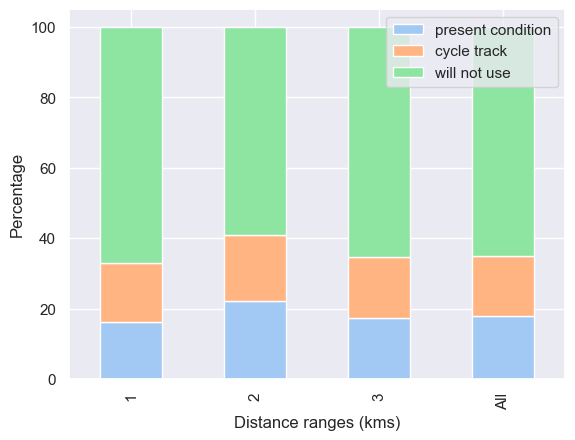

(588, 58)


In [57]:
df1=df_park.loc[(df_park['ORIGIN']==1) & (df_park['N_BICYCLES']==0)]
df1=df1.loc[df1['PARK']!=3]
crosstab=pd.crosstab(df1['ACCESS_DIS_BIN'],df1['PARK'],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Distance ranges (kms)')
plt.ylabel('Percentage')
plt.legend(['present condition','cycle track','will not use'])
plt.show()
print(df1.shape)

A pie chart for bicycle use at different prices

(660, 58) (1191, 58) (642, 58)


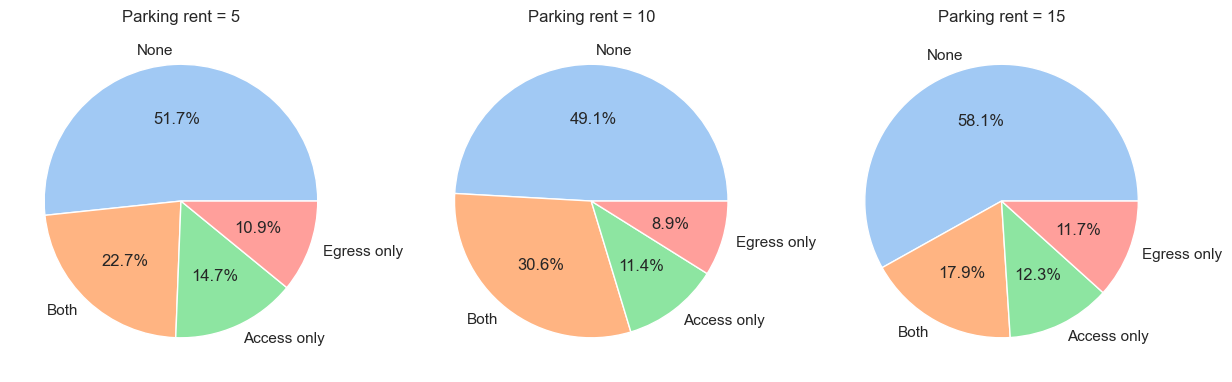

4    341
3    150
1     97
2     72
Name: RENT_BICYCLE, dtype: int64


In [58]:

df1=df[df['PARK_RENT']==5]
df2=df[df['PARK_RENT']==10]
df3=df[df['PARK_RENT']==15]
print(df1.shape,df2.shape,df3.shape)

# lets plot 3 pie charts in a single figure side by side
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.pie(df1['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Parking rent = 5')
plt.subplot(132)
plt.pie(df2['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Parking rent = 10')
plt.subplot(133)
plt.pie(df3['RENT_BICYCLE'].value_counts(),labels=['None','Both','Access only','Egress only'],autopct='%1.1f%%')
plt.title('Parking rent = 15')
plt.show()
print(df1['RENT_BICYCLE'].value_counts())

When access time is less than 20 minutes and egress time is greater than 20 

In [59]:

df1=df.loc[(df['ACCESS_TIME']<20) ]
df1=df1.loc[(df1['RENT_BICYCLE']!=4) & (df1['RENT_BICYCLE']!=3)]
# sns.histplot(data=df1,x='RENT_BICYCLE',stat='percent')
fig=px.histogram(data_frame=df1,x='RENT_BICYCLE',histnorm='percent',width=500, height=400, template="simple_white",category_orders={"RENT_BICYCLE":["Access only","Egress only","Both"]})
fig.show()

When egress time is less than 20 minutes, commuter use bicycle only for access trip

<AxesSubplot: xlabel='RENT_BICYCLE', ylabel='Percent'>

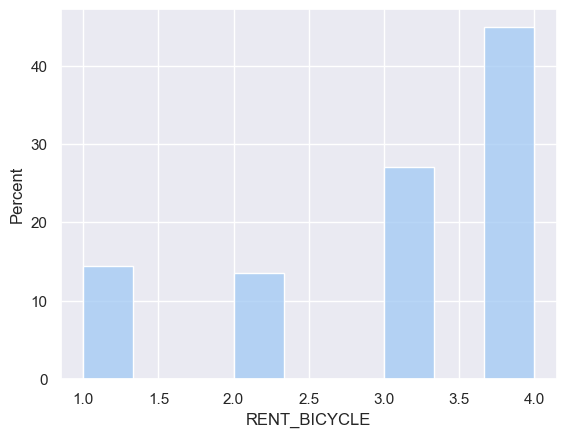

In [60]:
df1=df.loc[(df['ACCESS_TIME']>=20) & (df['EGRESS_TIME']<20) ]
sns.histplot(data=df1,x='RENT_BICYCLE',stat='percent')

ACCESS_TIME_B    1-5   6-10  11-20  21-60
EGRESS_TIME_B                            
1-5            47.40  32.29  16.15   4.17
6-10           33.33  40.78  21.96   3.92
11-20          26.32  32.89  36.84   3.95
21-60          20.69  31.03  31.03  17.24
All            35.35  35.83  24.20   4.62


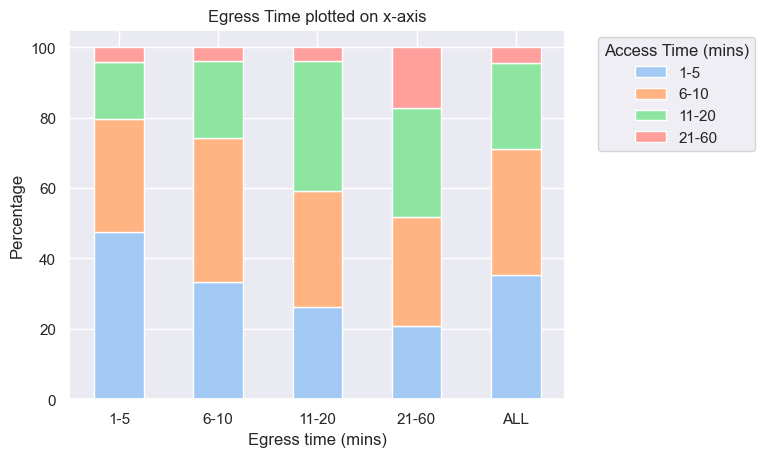

In [61]:
df1=df[df['RENT_BICYCLE']==3]
crosstab=pd.crosstab(df1["EGRESS_TIME_B"],df1["ACCESS_TIME_B"],margins=True,normalize='index')*100
crosstab=np.round(crosstab,decimals=2)
print(crosstab)

# Plotting crosstabulation
bar_width=0.5
crosstab.plot(kind='bar',stacked=True,width=bar_width)
plt.xlabel('Egress time (mins)')
plt.ylabel('Percentage')
plt.title("Egress Time plotted on x-axis")
plt.xticks([0,1,2,3,4],['1-5','6-10','11-20','21-60','ALL'])
plt.legend(['1-5','6-10','11-20','21-60'])
plt.legend(title='Access Time (mins)',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

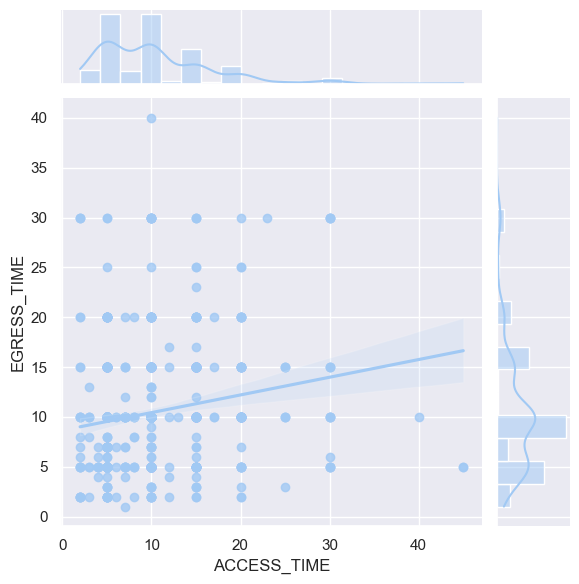

In [62]:
df1=df[df['RENT_BICYCLE']==3]
df1=df1.loc[(df1['ACCESS_TIME']<60) & (df1['EGRESS_TIME']<60)]
sns.jointplot(data=df1,x='ACCESS_TIME',y='EGRESS_TIME',kind='reg')

Less access and egress times?? still willing to use bicycle or both? Is it because of access/egress modes?

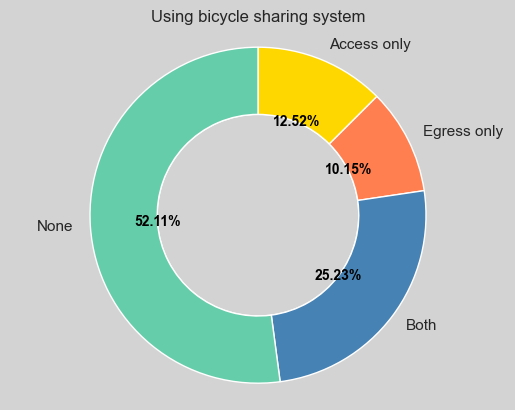

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt



# Assuming 'df' is your DataFrame
total = len(df['RENT_BICYCLE'])
counts = df['RENT_BICYCLE'].value_counts(normalize=True).sort_index() * 100

# Create a pie chart
fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgrey')  # Set the background color
custom_palette = ['gold', 'coral', 'steelblue', 'mediumaquamarine']  
# Inner circle (donut chart)
ax.pie([1], radius=0.6, colors=['lightgrey'], startangle=90, counterclock=False)

# Outer circle (pie chart)
wedges, texts, autotexts = ax.pie(counts, labels=['Access only', 'Egress only', 'Both', 'None'], autopct='%1.2f%%', startangle=90, counterclock=False, wedgeprops=dict(width=0.4),colors=custom_palette)

# Add percentage labels inside the pie chart
for autotext in autotexts:
    autotext.set(color='black', size=10, weight='bold')

# Set aspect ratio to be equal for a circular pie chart
ax.axis('equal')
plt.title('Using bicycle sharing system')
plt.show()


Why do people still prefer to walk when access or egress is more than 1 km????

In [64]:
df_temp=df[df['RENT_BICYCLE']==4]
df_temp=df_temp.loc[(df_temp['ACCESS_DIS_B']>1) & (df_temp['EGRESS_DIS_B']>1) & (df_temp['AGE_C']<5)]
df_temp=df_temp[(df_temp['ACCESS_M']==1) | (df_temp['EGRESS_M']==1)]

combined_metro_stations = pd.concat([df_temp['M_ORIGIN'], df_temp['M_DESTINATION']])
print(df_temp['M_ORIGIN'].unique().shape[0])
print(df_temp['M_DESTINATION'].unique().shape[0])

# Get the combined value counts
# print(df_temp['M_DESTINATION'].value_counts())

65
85


They aren't willing to use for Egress, but why?

In [65]:
df_a=df[df['RENT_BICYCLE']==1]
df_a=df_a.loc[(df_a['EGRESS_DIS_B']!=1) & (df_a['EGRESS_DIS_B']!=5) &(df_a['EGRESS_M']==1) ]
# df_a['AGE_C'].value_counts()
# print(df_a['M_DESTINATION'].value_counts(),df_a.shape[0])

In [66]:
df_e=df[df['RENT_BICYCLE']==2]
df_e=df_e.loc[(df_e['ACCESS_DIS_B']!=1) & (df_e['ACCESS_DIS_B']!=5) & (df_e['ACCESS_M']==1)]
# df_e['D_TYPE'].value_counts()
# df_e['M_ORIGIN'].value_counts()


Mapping access and egress modes

In [67]:
access_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Other',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping ACCESS_M to above dictionary

df['A_M']=df['ACCESS_M'].map(access_map)



egress_map={1:'Walk',2:'Bicycle',3:'Two wheeler',4:'Car',5:'Ride hire',6:'Ride hire',7:'Other',8:'Other',9:'Other',10:'Other',11:'Other',12:'Other'}

# create a new column mapping EGRESS_M to above dictionary

df['E_M']=df['EGRESS_M'].map(egress_map)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Access mode')

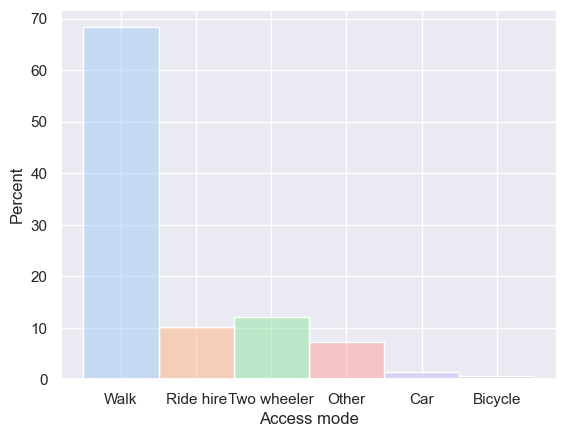

In [68]:
sns.histplot(data=df,x='A_M',hue='A_M',stat='percent')
plt.legend().remove()
plt.xlabel('Access mode')

In [69]:
df['new_A_M']=np.where((df['RENT_BICYCLE']==1)| (df['RENT_BICYCLE']==3),'Bicycle',df['A_M'])
df['new_E_M']=np.where((df['RENT_BICYCLE']==2)| (df['RENT_BICYCLE']==3),'Bicycle',df['A_M'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Access mode')

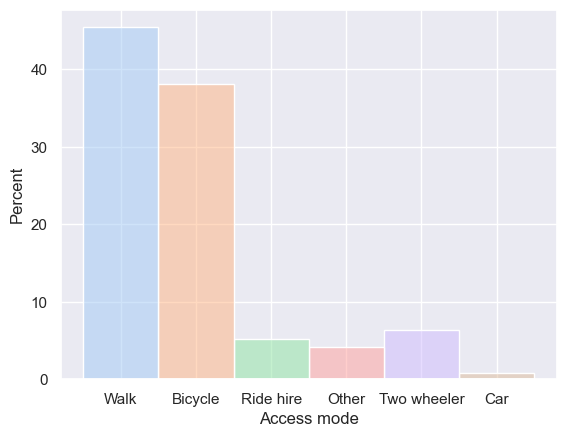

In [70]:
sns.histplot(data=df,x='new_A_M',hue='new_A_M',stat='percent')
plt.legend().remove()
plt.xlabel('Access mode')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'Access mode')

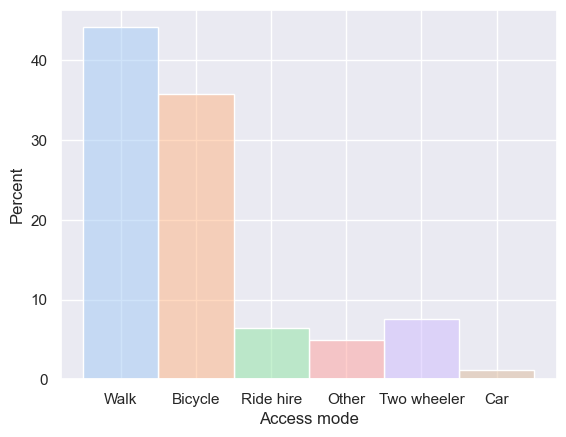

In [71]:
sns.histplot(data=df,x='new_E_M',hue='new_E_M',stat='percent')
plt.legend().remove()
plt.xlabel('Access mode')

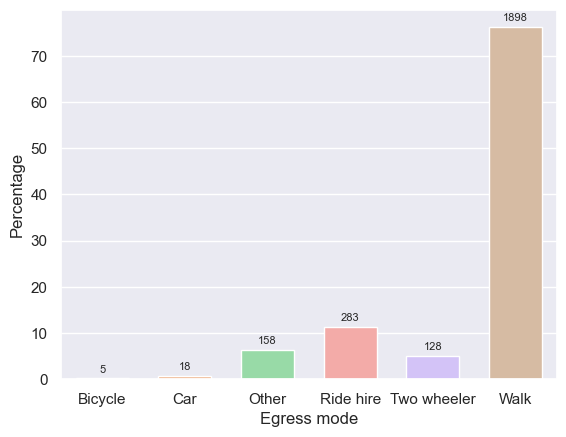

In [72]:
# Group by 'E_M' and calculate percentages

df_percentage = df.groupby('E_M').size() / len(df) * 100
df_percentage = df_percentage.reset_index(name='Percentage')

# Create a bar plot using the calculated percentages
ax = sns.barplot(data=df_percentage, x='E_M', y='Percentage', hue='E_M', dodge=False)
plt.xlabel('Egress mode')
plt.ylabel('Percentage')
plt.legend().remove()

# Calculate the counts
counts = df['E_M'].value_counts().to_dict()

# Get the current axis
ax = plt.gca()

for patch in ax.patches:
    # Get the height of the bar
    height = patch.get_height()

    # Skip bars with a height of NaN
    if np.isnan(height):
        continue

    # Get the 'E_M' value corresponding to the bar
    label = patch.get_x() + patch.get_width() / 2

    # Calculate the count from the percentage
    count = int((height / 100) * len(df))

    # Annotate the count
    ax.annotate(f'{count}', 
                xy=(label, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

# Adjust the bar width
for patch in ax.patches:
    current_width = patch.get_width()
    new_width = 0.8 * current_width  # Adjust the multiplier as needed
    diff = current_width - new_width

    # Set new width for each bar
    patch.set_width(new_width)
    patch.set_x(patch.get_x() + diff * 0.5)

plt.show()


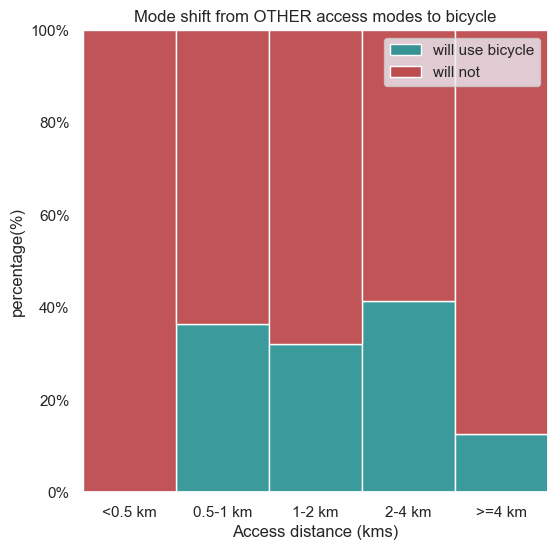

In [79]:
df1=df.copy()
a_m={1:1,3:1,4:2}
df1=df1[df1['RENT_BICYCLE']!=3]

# df1.reset_index(drop=True, inplace=True)

df1['RENT_BICYCLE']=df1['RENT_BICYCLE'].map(a_m)

# Reverse the order of the categories in the 'RENT_BICYCLE' column
df1['RENT_BICYCLE'] = df1['RENT_BICYCLE'].map({1: 2, 2: 1})

import pandas as pd

# Define the order of the categories
cat_type = pd.api.types.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)

# Convert the 'ACCESS_DIS_B' column to the categorical type
df1['ACCESS_DIS_B'] = df1['ACCESS_DIS_B'].astype(cat_type)
df1=df1[df1['A_M']=='Other']
# Plot the data
sns.set_style('dark')
custom_palette = ['firebrick','teal']
plt.figure(figsize=(6,6))

ax=sns.histplot(x=df1['ACCESS_DIS_B'],hue=df1['RENT_BICYCLE'],multiple='fill', palette=custom_palette)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.title('Mode shift from OTHER access modes to bicycle')
plt.xlabel('Access distance (kms)')
plt.ylabel('percentage(%)')
plt.xticks([1,2,3,4,5],['<0.5 km','0.5-1 km','1-2 km','2-4 km', '>=4 km'])
plt.legend(['will use bicycle', 'will not'])
plt.show()

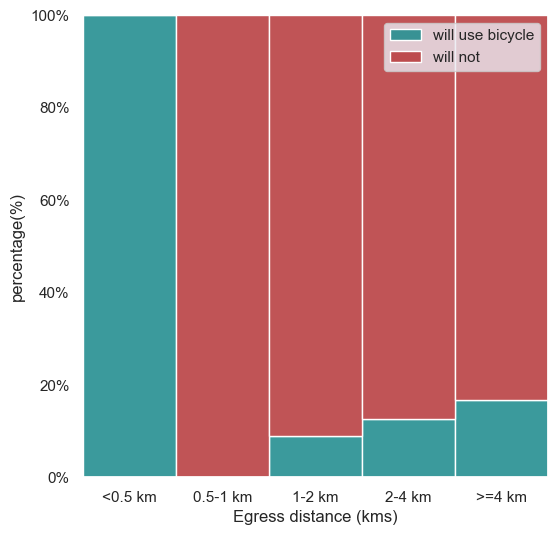

In [80]:
df1=df.copy()
a_m={1:1,3:1,4:2}
df1=df1[df1['RENT_BICYCLE']!=3]

# df1.reset_index(drop=True, inplace=True)

df1['RENT_BICYCLE']=df1['RENT_BICYCLE'].map(a_m)

# Reverse the order of the categories in the 'RENT_BICYCLE' column
df1['RENT_BICYCLE'] = df1['RENT_BICYCLE'].map({1: 2, 2: 1})

import pandas as pd

# Define the order of the categories
cat_type = pd.api.types.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)

# Convert the 'ACCESS_DIS_B' column to the categorical type
df1['EGRESS_DIS_B'] = df1['EGRESS_DIS_B'].astype(cat_type)

# Plot the data
sns.set_style('dark')
custom_palette = ['firebrick','teal']
plt.figure(figsize=(6,6))

df1=df1[df1['E_M']=='Ride hire']

ax=sns.histplot(x=df1['EGRESS_DIS_B'],hue=df1['RENT_BICYCLE'],multiple='fill', palette=custom_palette)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.xlabel('Egress distance (kms)')
plt.ylabel('percentage(%)')
plt.xticks([1,2,3,4,5],['<0.5 km','0.5-1 km','1-2 km','2-4 km', '>=4 km'])
plt.legend(['will use bicycle', 'will not'])
plt.show()

Text(0.5, 0, 'Access distance')

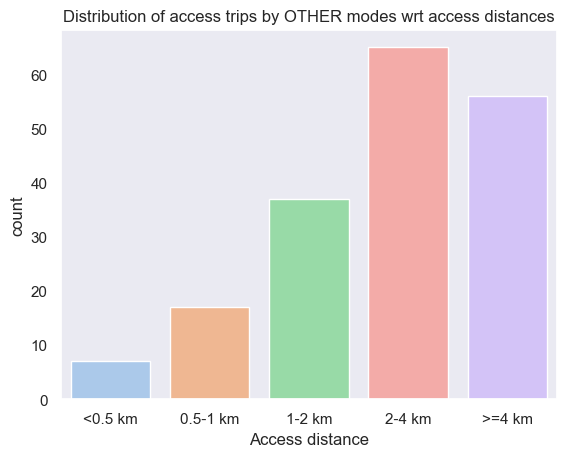

In [81]:
# lets the the number of values for each ACCESS_DIS_B for the column 'A_M' equal to Ride hire
df1=df.copy()
df1=df1[df1['A_M']=='Other']

sns.countplot(data=df1,x='ACCESS_DIS_B')
plt.xticks([0,1,2,3,4],['<0.5 km','0.5-1 km','1-2 km','2-4 km', '>=4 km'])
plt.title('Distribution of access trips by OTHER modes wrt access distances')
plt.xlabel('Access distance')

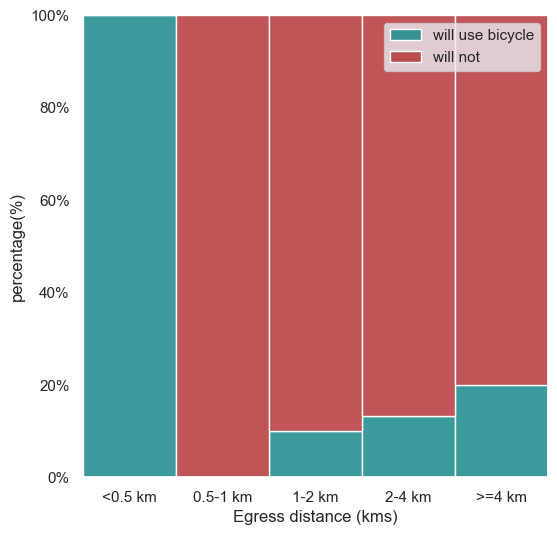

In [82]:
df1=df.copy()
a_m={1:1,3:1,4:2}
df1=df1[df1['RENT_BICYCLE']!=3]

# df1.reset_index(drop=True, inplace=True)

df1['RENT_BICYCLE']=df1['RENT_BICYCLE'].map(a_m)

# Reverse the order of the categories in the 'RENT_BICYCLE' column
df1['RENT_BICYCLE'] = df1['RENT_BICYCLE'].map({1: 2, 2: 1})

import pandas as pd

# Define the order of the categories
cat_type = pd.api.types.CategoricalDtype(categories=[1,2,3,4,5], ordered=True)

# Convert the 'ACCESS_DIS_B' column to the categorical type
df1['EGRESS_DIS_B'] = df1['EGRESS_DIS_B'].astype(cat_type)
df1=df1[df1['EGRESS_M']==5]

# Plot the data
sns.set_style('dark')
custom_palette = ['firebrick','teal']
plt.figure(figsize=(6,6))

ax=sns.histplot(x=df1['EGRESS_DIS_B'],hue=df1['RENT_BICYCLE'],multiple='fill', palette=custom_palette)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
plt.xlabel('Egress distance (kms)')
plt.ylabel('percentage(%)')
plt.xticks([1,2,3,4,5],['<0.5 km','0.5-1 km','1-2 km','2-4 km', '>=4 km'])
plt.legend(['will use bicycle', 'will not'])
plt.show()

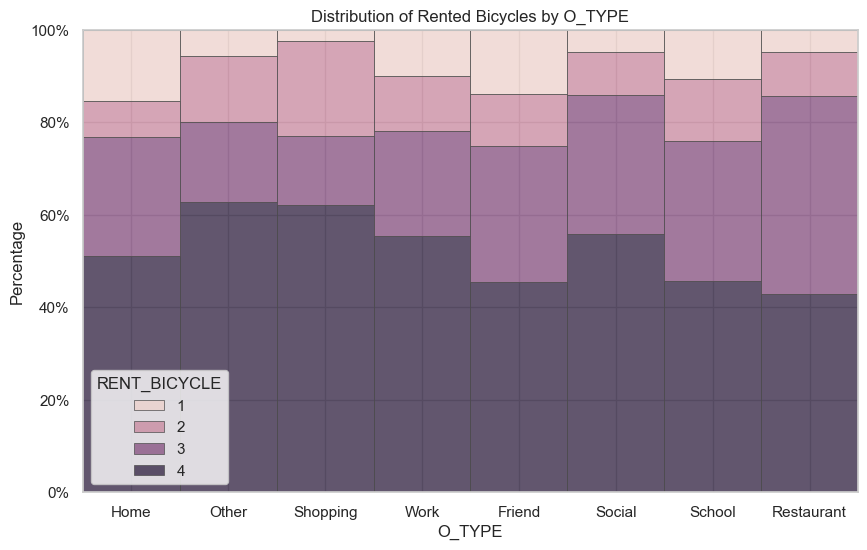

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a custom style for the plot
sns.set(style="whitegrid", palette="pastel")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="O_TYPE", hue="RENT_BICYCLE", multiple='fill', stat='percent', edgecolor=".3", linewidth=0.5)

# Customize the plot further if needed
plt.title("Distribution of Rented Bicycles by O_TYPE")
plt.xlabel("O_TYPE")
plt.ylabel("Percentage")
# multiply the y-axis by 100
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))

# Show the plot
plt.show()


In [84]:
def map_o_type(value):
    origin_mapper = {
        'Friend': 'Social',
        'Restaurent': 'Other',
        'Work': 'Work',
        'School': 'School',
        'Shopping': 'Other',
        'Other': 'Other',
        'Home': 'Home'
    }
    
    return origin_mapper.get(value, value)  # If the value is not in the mapper, return the original value

# Apply the mapping function to the 'O_TYPE' column
df['O_TYPE'] = df['O_TYPE'].map(map_o_type)

# Check the result
print(df['O_TYPE'].value_counts())


Home          1402
Work           408
School         263
Other          248
Social         151
Restaurant      21
Name: O_TYPE, dtype: int64
